<a href="https://www.kaggle.com/code/junaeidali123/project438?scriptVersionId=254646620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

dataset_path = '/kaggle/input/x-ray-bone-fracture-dataset/X-ray Bone Fracture Dataset Comprehensive Imaging for Fracture Classification and Medical Research/Bone -Fracture/Bone Fracture/Orginal'
# Get list of subfolders (class names)
class_names = next(os.walk(dataset_path))[1]

print("Classes found:")
for class_name in class_names:
    print(class_name)


Classes found:
Comminuted Bone Fracture
Simple Bone Fracture


In [2]:
import os

dataset_path = '/kaggle/input/x-ray-bone-fracture-dataset/X-ray Bone Fracture Dataset Comprehensive Imaging for Fracture Classification and Medical Research/Bone -Fracture/Bone Fracture/Orginal'

# Valid image extensions
valid_exts = ('.jpg', '.jpeg', '.png', '.bmp')

# Count total number of images
total_images = 0

for root, dirs, files in os.walk(dataset_path):
    image_files = [f for f in files if f.lower().endswith(valid_exts)]
    total_images += len(image_files)

print(f"Total number of images in the dataset: {total_images}")


Total number of images in the dataset: 2384


In [3]:
import os

dataset_path = '/kaggle/input/x-ray-bone-fracture-dataset/X-ray Bone Fracture Dataset Comprehensive Imaging for Fracture Classification and Medical Research/Bone -Fracture/Bone Fracture/Orginal'

# Get list of class folders (subdirectories)
class_names = next(os.walk(dataset_path))[1]

total_images = 0
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    num_files = len(files)
    class_counts[class_name] = num_files
    total_images += num_files

# Output
print(f"Total number of images: {total_images}\n")
print("Images per class:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count}")


Total number of images: 2384

Images per class:
  Comminuted Bone Fracture: 1173
  Simple Bone Fracture: 1211


**Display the DataSet**

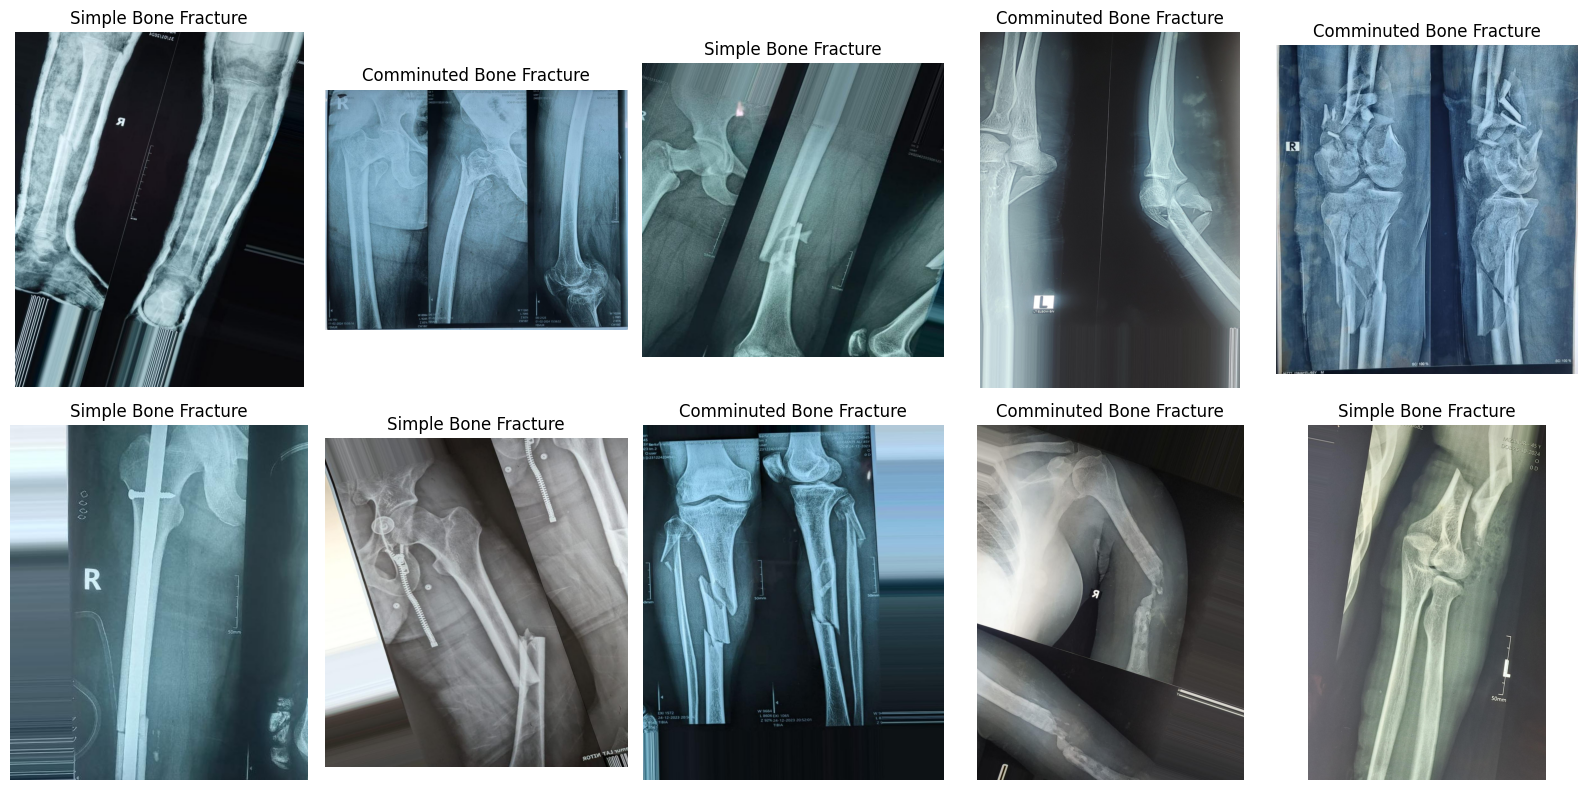

In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt

dataset_path = '/kaggle/input/x-ray-bone-fracture-dataset/X-ray Bone Fracture Dataset Comprehensive Imaging for Fracture Classification and Medical Research/Bone -Fracture/Bone Fracture/Orginal'

# Gather all image file paths
image_paths = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Pick 10 random images
selected_images = random.sample(image_paths, 10)

# Display images
plt.figure(figsize=(16, 8))
for i, img_path in enumerate(selected_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(img_path)))  # folder name as label
    plt.axis('off')

plt.tight_layout()
plt.show()


** Resize & Aspect Ratio Preservation**

✅ Finished resizing 2384 images
🕒 Total time: 54.25 seconds

🔍 Showing 3 before/after samples per class...


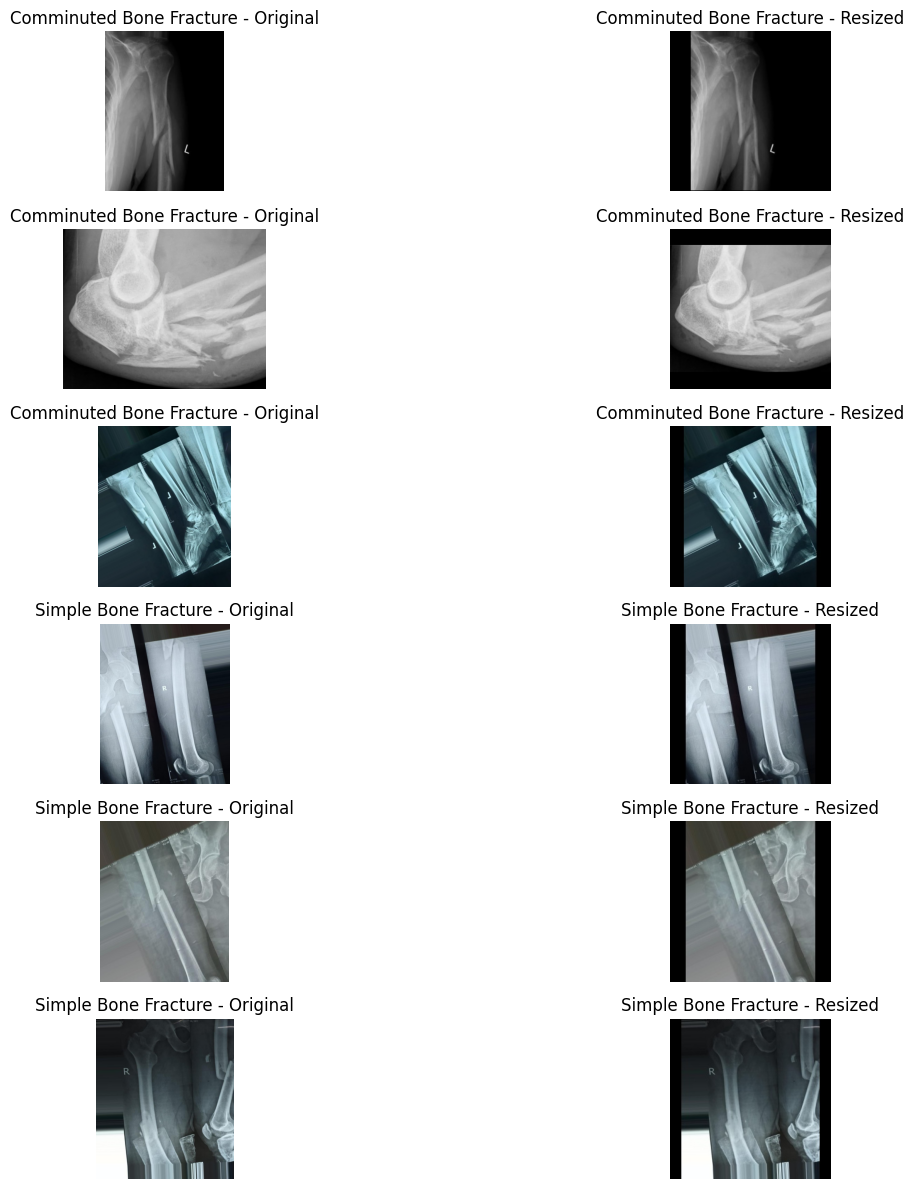

In [5]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
input_path = '/kaggle/input/x-ray-bone-fracture-dataset/X-ray Bone Fracture Dataset Comprehensive Imaging for Fracture Classification and Medical Research/Bone -Fracture/Bone Fracture/Orginal'
output_path = '/kaggle/working/processed_dataset'  # Save location
target_size = (256, 256)
classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']

os.makedirs(output_path, exist_ok=True)

def resize_with_aspect_ratio(img, target_size):
    h, w = img.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    top = (target_size[0] - new_h) // 2
    bottom = target_size[0] - new_h - top
    left = (target_size[1] - new_w) // 2
    right = target_size[1] - new_w - left
    padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    return padded

# --- Step 1: Resize all images and save ---
start_time = time.time()
image_count = 0

for class_name in classes:
    input_class_dir = os.path.join(input_path, class_name)
    output_class_dir = os.path.join(output_path, class_name)
    os.makedirs(output_class_dir, exist_ok=True)

    for file in os.listdir(input_class_dir):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_class_dir, file)
            img = cv2.imread(img_path)

            if img is None:
                continue

            resized = resize_with_aspect_ratio(img, target_size)
            save_path = os.path.join(output_class_dir, file)
            cv2.imwrite(save_path, resized)
            image_count += 1

end_time = time.time()
print(f"✅ Finished resizing {image_count} images")
print(f"🕒 Total time: {end_time - start_time:.2f} seconds")

# --- Step 2: Display before/after examples from saved dataset ---
print("\n🔍 Showing 3 before/after samples per class...")

samples_per_class = {}
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)
    images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    samples_per_class[class_name] = random.sample(images, 3)

plt.figure(figsize=(16, 12))
plot_idx = 1

for class_name in classes:
    for img_path in samples_per_class[class_name]:
        original = cv2.imread(img_path)
        original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

        # Get resized version
        file_name = os.path.basename(img_path)
        resized_path = os.path.join(output_path, class_name, file_name)
        resized = cv2.imread(resized_path)
        resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

        # Before
        plt.subplot(6, 2, plot_idx)
        plt.imshow(original_rgb)
        plt.title(f"{class_name} - Original")
        plt.axis('off')
        plot_idx += 1

        # After
        plt.subplot(6, 2, plot_idx)
        plt.imshow(resized_rgb)
        plt.title(f"{class_name} - Resized")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.show()


**Noise Reduction**


⚙️ Applying MEDIAN filter to all images...
✅ Saved 2384 images using MEDIAN filter
🕒 Time taken: 2.53 seconds

⚙️ Applying GAUSSIAN filter to all images...
✅ Saved 2384 images using GAUSSIAN filter
🕒 Time taken: 3.81 seconds

⚙️ Applying NON_LOCAL_MEANS filter to all images...
✅ Saved 2384 images using NON_LOCAL_MEANS filter
🕒 Time taken: 430.60 seconds

🔍 Displaying 3 sample results for: MEDIAN


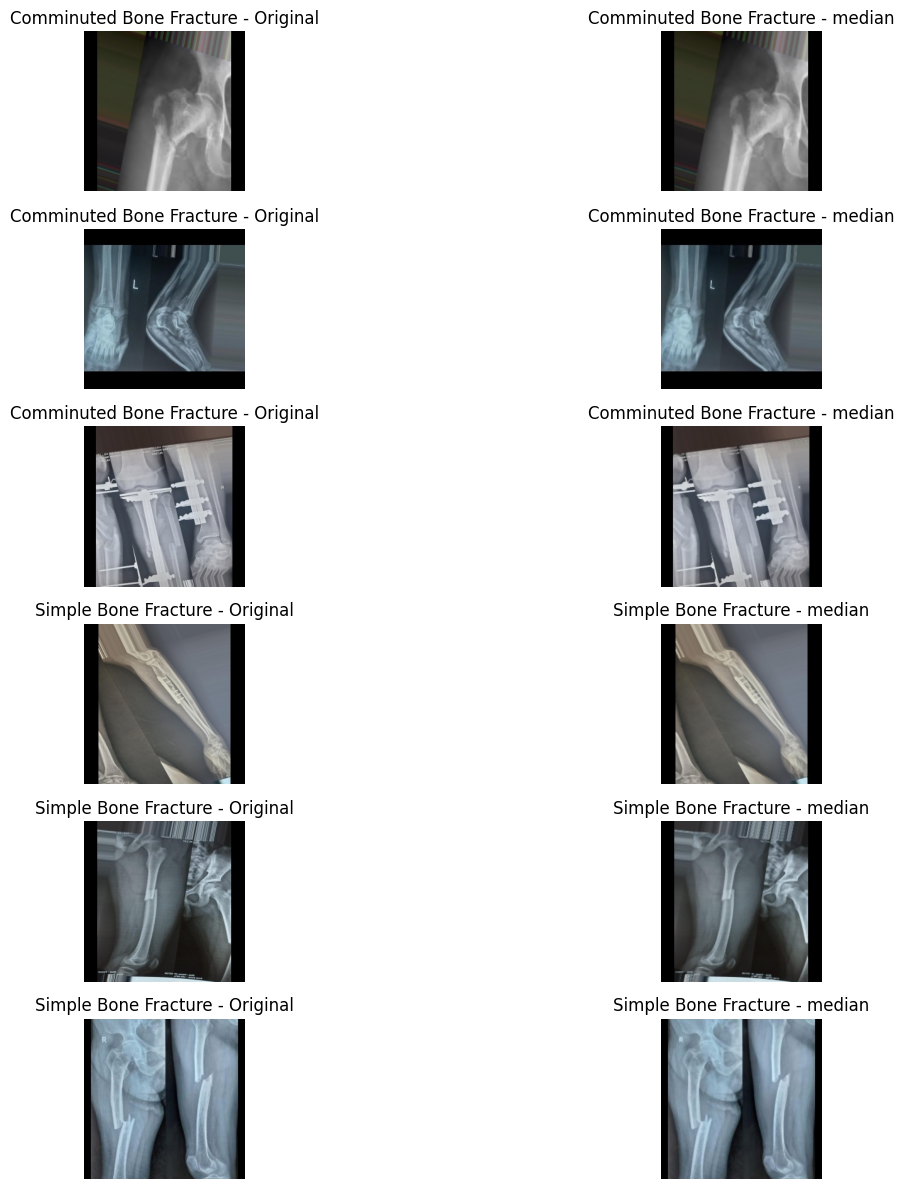


🔍 Displaying 3 sample results for: GAUSSIAN


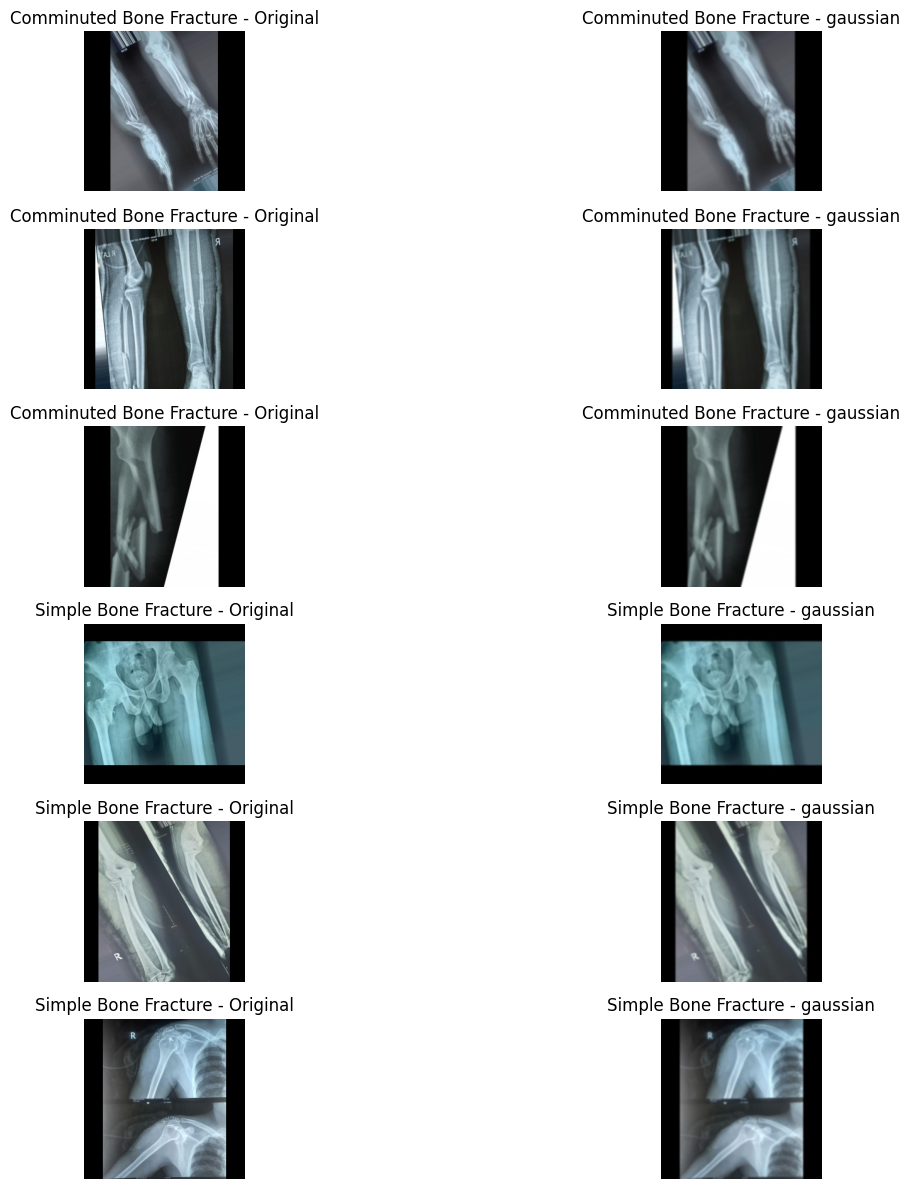


🔍 Displaying 3 sample results for: NON_LOCAL_MEANS


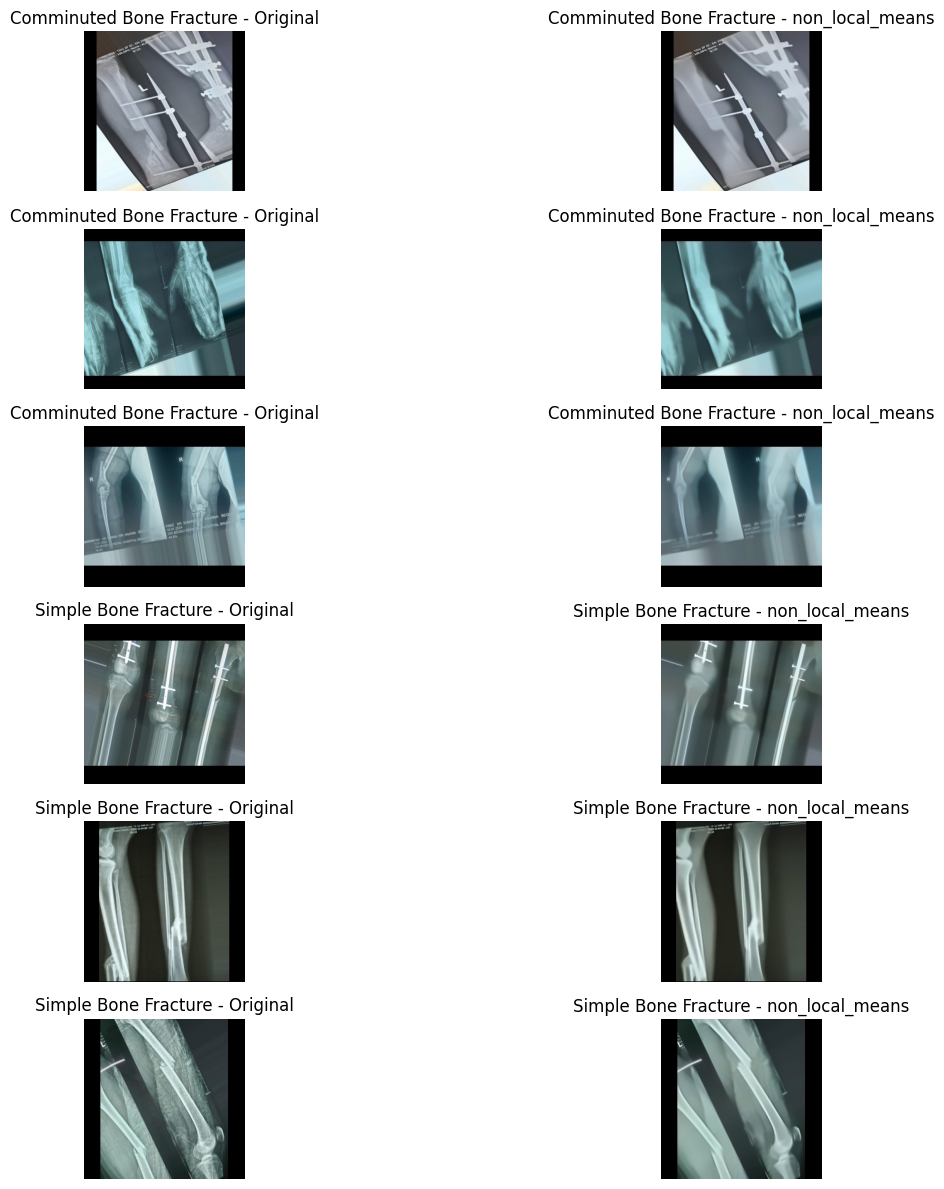


🎉 All denoising complete and visualized.


In [6]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = '/kaggle/working/processed_dataset'  # Use resized dataset
output_root = '/kaggle/working/denoised_dataset'  # Save all filtered images here
target_size = (256, 256)
classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']
techniques = ['median', 'gaussian', 'non_local_means']

# --- NOISE REDUCTION FUNCTIONS ---
def apply_median(img):
    return cv2.medianBlur(img, 3)

def apply_gaussian(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def apply_nlm(img):
    return cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

technique_funcs = {
    'median': apply_median,
    'gaussian': apply_gaussian,
    'non_local_means': apply_nlm
}

# --- STEP 1: Apply each denoising technique to the entire dataset ---
for tech in techniques:
    print(f"\n⚙️ Applying {tech.upper()} filter to all images...")
    start_time = time.time()
    saved_count = 0

    for class_name in classes:
        input_class_dir = os.path.join(input_path, class_name)
        output_class_dir = os.path.join(output_root, tech, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        for file in os.listdir(input_class_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(input_class_dir, file)
                img = cv2.imread(img_path)

                if img is None:
                    continue

                filtered = technique_funcs[tech](img)
                save_path = os.path.join(output_class_dir, file)
                cv2.imwrite(save_path, filtered)
                saved_count += 1

    duration = time.time() - start_time
    print(f"✅ Saved {saved_count} images using {tech.upper()} filter")
    print(f"🕒 Time taken: {duration:.2f} seconds")

# --- STEP 2: Display 3 before/after samples per class per technique ---
for tech in techniques:
    print(f"\n🔍 Displaying 3 sample results for: {tech.upper()}")
    samples_per_class = {}

    for class_name in classes:
        class_dir = os.path.join(input_path, class_name)
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        samples_per_class[class_name] = random.sample(images, 3)

    plt.figure(figsize=(16, 12))
    plot_idx = 1

    for class_name in classes:
        for file in samples_per_class[class_name]:
            original_path = os.path.join(input_path, class_name, file)
            filtered_path = os.path.join(output_root, tech, class_name, file)

            original = cv2.imread(original_path)
            filtered = cv2.imread(filtered_path)

            original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
            filtered_rgb = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)

            # Before
            plt.subplot(6, 2, plot_idx)
            plt.imshow(original_rgb)
            plt.title(f"{class_name} - Original")
            plt.axis('off')
            plot_idx += 1

            # After
            plt.subplot(6, 2, plot_idx)
            plt.imshow(filtered_rgb)
            plt.title(f"{class_name} - {tech}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.show()

print("\n🎉 All denoising complete and visualized.")


**Contrast Enhancement**


⚙️ Applying HIST_EQ to all images...
✅ Saved 2384 enhanced images using HIST_EQ
🕒 Time taken: 2.81 seconds

⚙️ Applying CLAHE to all images...
✅ Saved 2384 enhanced images using CLAHE
🕒 Time taken: 7.22 seconds

⚙️ Applying STRETCH to all images...
✅ Saved 2384 enhanced images using STRETCH
🕒 Time taken: 3.54 seconds

🔍 Displaying samples for: HIST_EQ


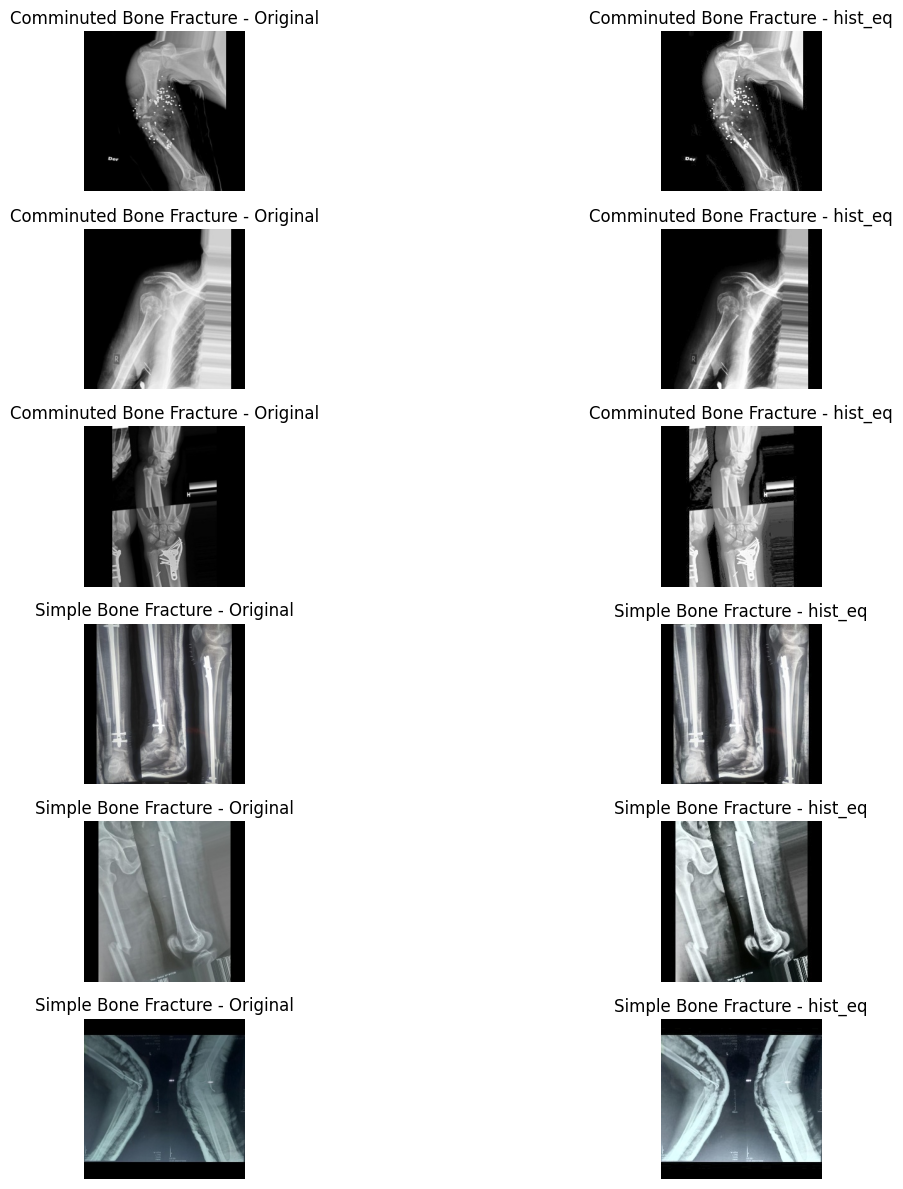


🔍 Displaying samples for: CLAHE


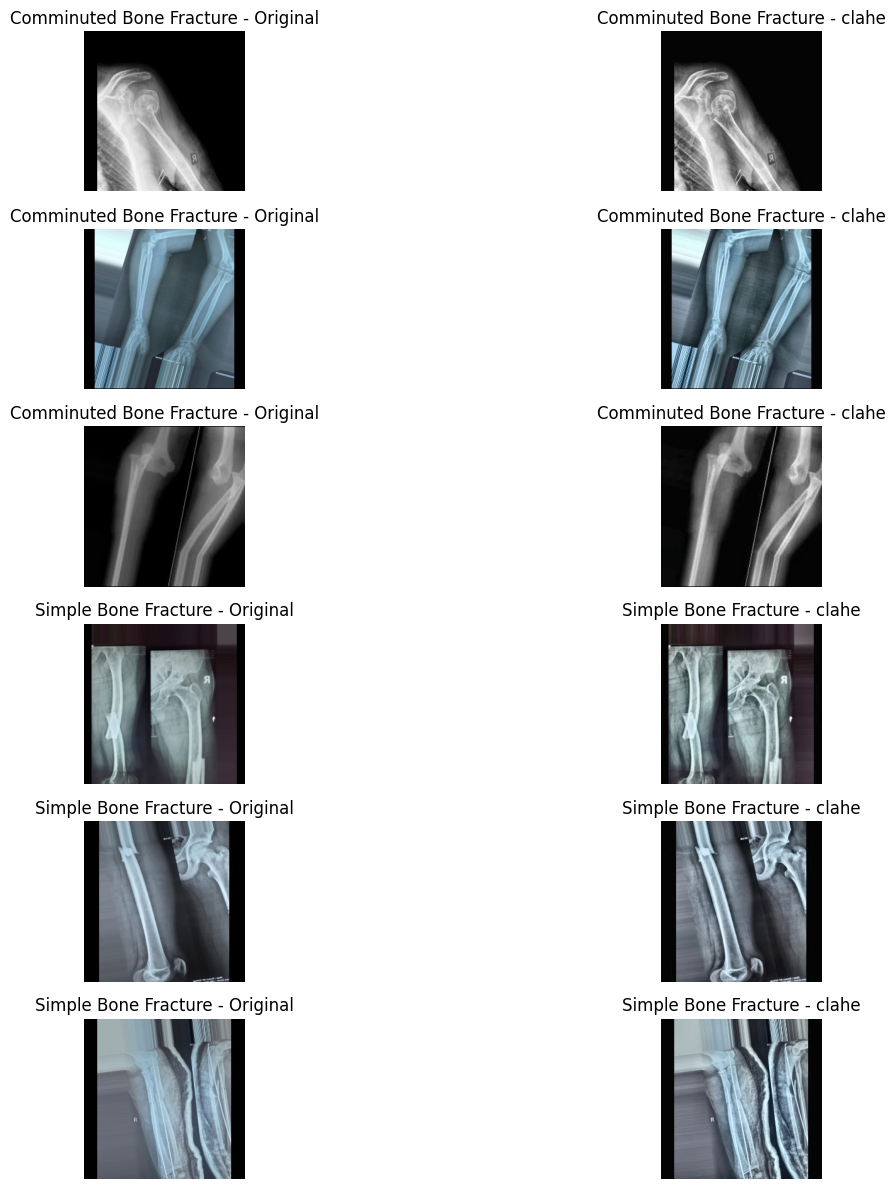


🔍 Displaying samples for: STRETCH


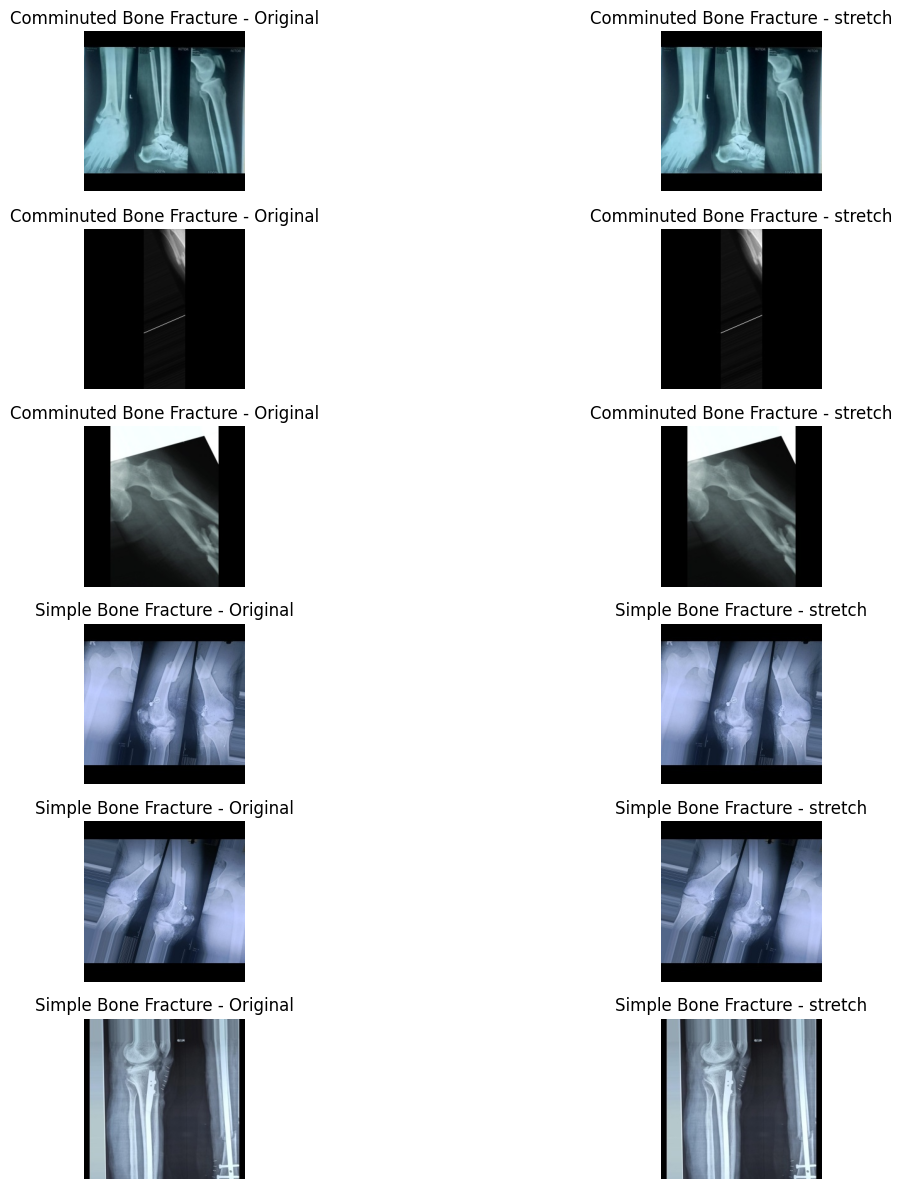

In [7]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = '/kaggle/working/processed_dataset'  # Already resized dataset
output_root = '/kaggle/working/contrast_enhanced_dataset'
classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']
techniques = ['hist_eq', 'clahe', 'stretch']

# --- CONTRAST ENHANCEMENT FUNCTIONS ---
def apply_hist_eq(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def apply_clahe(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def apply_stretch(img):
    img_float = img.astype(np.float32)
    min_val, max_val = np.min(img_float), np.max(img_float)
    stretched = (img_float - min_val) * (255.0 / (max_val - min_val))
    return stretched.clip(0, 255).astype(np.uint8)

technique_funcs = {
    'hist_eq': apply_hist_eq,
    'clahe': apply_clahe,
    'stretch': apply_stretch
}

# --- STEP 1: Apply enhancement to the entire dataset ---
for tech in techniques:
    print(f"\n⚙️ Applying {tech.upper()} to all images...")
    start_time = time.time()
    saved_count = 0

    for class_name in classes:
        input_class_dir = os.path.join(input_path, class_name)
        output_class_dir = os.path.join(output_root, tech, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        for file in os.listdir(input_class_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(input_class_dir, file)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                enhanced = technique_funcs[tech](img)
                save_path = os.path.join(output_class_dir, file)
                cv2.imwrite(save_path, enhanced)
                saved_count += 1

    duration = time.time() - start_time
    print(f"✅ Saved {saved_count} enhanced images using {tech.upper()}")
    print(f"🕒 Time taken: {duration:.2f} seconds")

# --- STEP 2: Display 3 before/after images per class for each technique ---
for tech in techniques:
    print(f"\n🔍 Displaying samples for: {tech.upper()}")
    samples_per_class = {}

    for class_name in classes:
        class_dir = os.path.join(input_path, class_name)
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        samples_per_class[class_name] = random.sample(images, 3)

    plt.figure(figsize=(16, 12))
    plot_idx = 1

    for class_name in classes:
        for file in samples_per_class[class_name]:
            original_path = os.path.join(input_path, class_name, file)
            enhanced_path = os.path.join(output_root, tech, class_name, file)

            original = cv2.imread(original_path)
            enhanced = cv2.imread(enhanced_path)

            original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
            enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

            # Before
            plt.subplot(6, 2, plot_idx)
            plt.imshow(original_rgb)
            plt.title(f"{class_name} - Original")
            plt.axis('off')
            plot_idx += 1

            # After
            plt.subplot(6, 2, plot_idx)
            plt.imshow(enhanced_rgb)
            plt.title(f"{class_name} - {tech}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.show()


**Colour Space Conversion & Channel-wise Stretching**


⚙️ [HSV_STRETCH] Stretching V channel in HSV enhances brightness without affecting hue or saturation.
✅ [HSV_STRETCH] Processed 2384 images | Time: 3.87s | Memory in: 468.71MB, out: 468.71MB

⚙️ [LAB_STRETCH] Stretching L channel in LAB improves lightness contrast while preserving colors.
✅ [LAB_STRETCH] Processed 2384 images | Time: 5.23s | Memory in: 468.71MB, out: 468.71MB

🔍 Showing 3 before/after pairs per class for: HSV_STRETCH


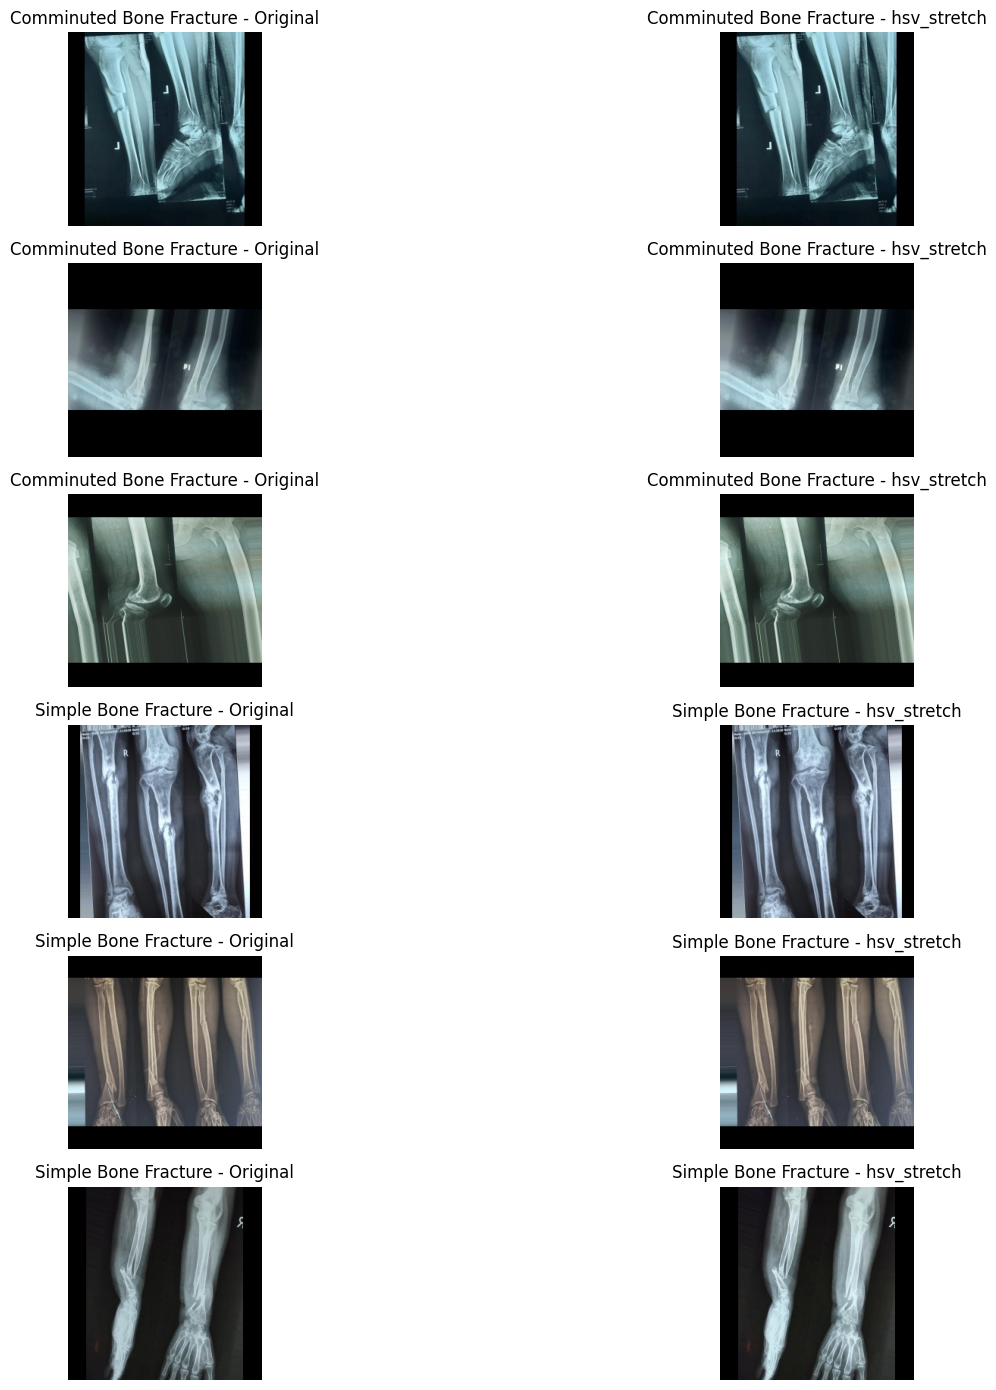


🔍 Showing 3 before/after pairs per class for: LAB_STRETCH


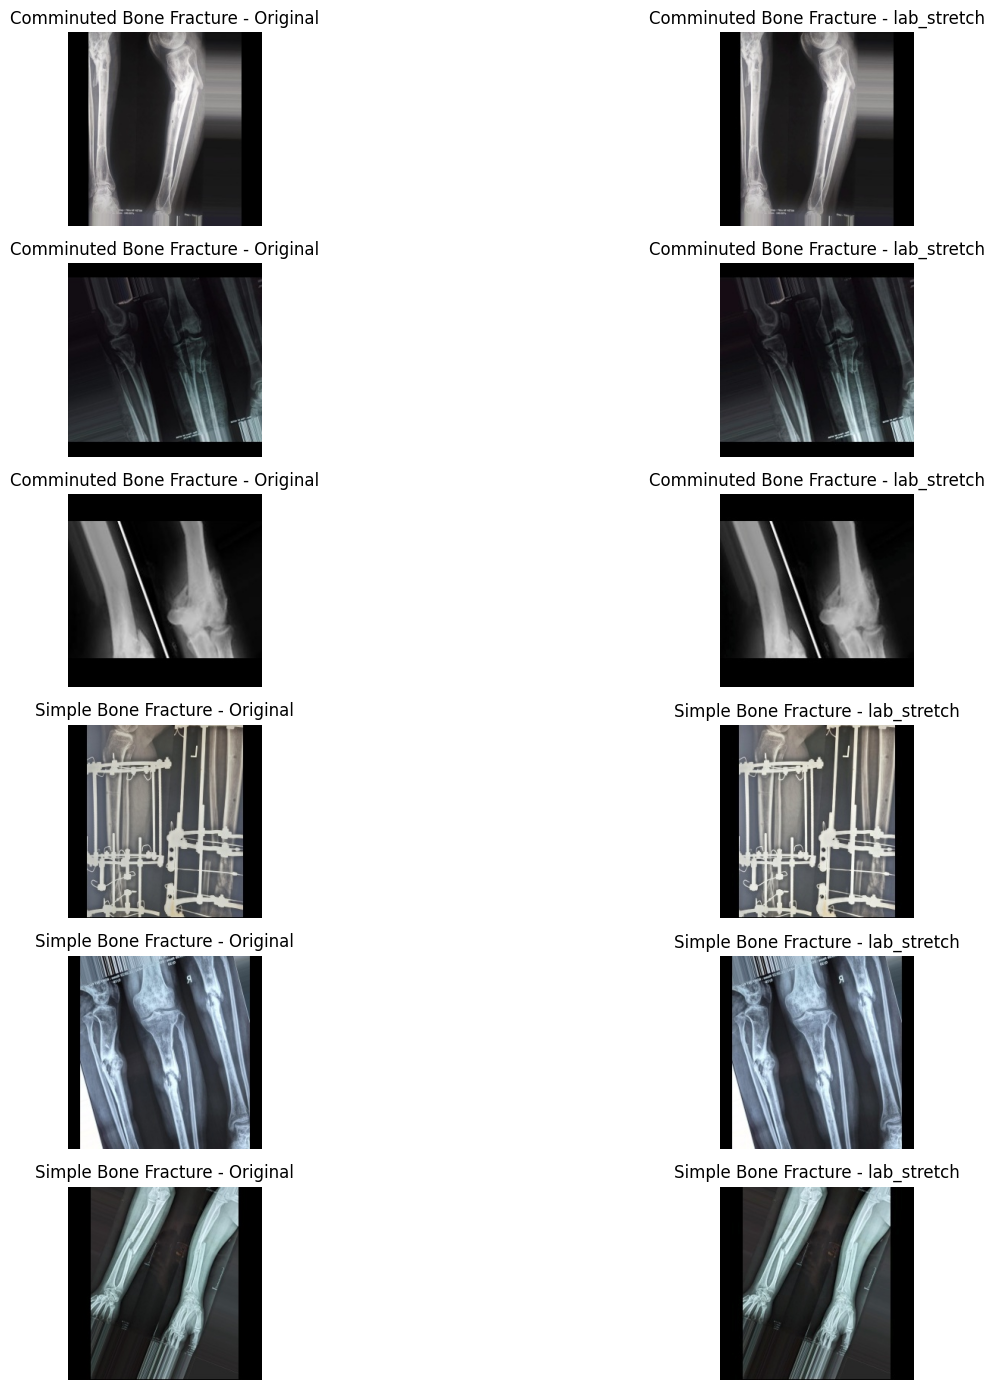

In [8]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIG ---
input_path = '/kaggle/working/processed_dataset'  # preprocessed resized images
output_root = '/kaggle/working/color_space_enhanced_dataset'
classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']
techniques = ['hsv_stretch', 'lab_stretch']

rationales = {
    'hsv_stretch': "Stretching V channel in HSV enhances brightness without affecting hue or saturation.",
    'lab_stretch': "Stretching L channel in LAB improves lightness contrast while preserving colors."
}

# Channel-wise stretch helper
def stretch_channel(channel):
    c_min, c_max = channel.min(), channel.max()
    if c_max - c_min < 1e-6:
        return channel.copy()
    stretched = ((channel - c_min) * (255.0 / (c_max - c_min))).astype(np.uint8)
    return stretched

# --- TECHNIQUE FUNCTIONS ---
def apply_hsv_stretch(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v = hsv[:, :, 2]
    hsv[:, :, 2] = stretch_channel(v)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def apply_lab_stretch(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l_stretched = stretch_channel(l)
    lab_stretched = cv2.merge((l_stretched, a, b))
    return cv2.cvtColor(lab_stretched, cv2.COLOR_LAB2BGR)

technique_funcs = {
    'hsv_stretch': apply_hsv_stretch,
    'lab_stretch': apply_lab_stretch
}

# --- STEP 1: Preprocess full dataset and save ---
for tech in techniques:
    print(f"\n⚙️ [{tech.upper()}] {rationales[tech]}")
    start_time = time.time()
    saved_count = 0
    total_bytes_in, total_bytes_out = 0, 0

    for class_name in classes:
        in_dir = os.path.join(input_path, class_name)
        out_dir = os.path.join(output_root, tech, class_name)
        os.makedirs(out_dir, exist_ok=True)

        for fname in os.listdir(in_dir):
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            img_path = os.path.join(in_dir, fname)
            img = cv2.imread(img_path)
            if img is None:
                continue

            total_bytes_in += img.nbytes

            enhanced = technique_funcs[tech](img)

            # Confirm same shape & dtype
            assert enhanced.shape == img.shape and enhanced.dtype == img.dtype, \
                f"Memory issue with {fname} at {tech}"

            total_bytes_out += enhanced.nbytes

            save_path = os.path.join(out_dir, fname)
            cv2.imwrite(save_path, enhanced)
            saved_count += 1

    elapsed = time.time() - start_time
    print(f"✅ [{tech.upper()}] Processed {saved_count} images | Time: {elapsed:.2f}s | "
          f"Memory in: {total_bytes_in/1e6:.2f}MB, out: {total_bytes_out/1e6:.2f}MB")

# --- STEP 2: Display 3 before/after samples per class per technique ---
for tech in techniques:
    print(f"\n🔍 Showing 3 before/after pairs per class for: {tech.upper()}")
    samples_per_class = {}

    for class_name in classes:
        in_dir = os.path.join(input_path, class_name)
        files = [f for f in os.listdir(in_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        samples_per_class[class_name] = random.sample(files, min(3, len(files)))

    plt.figure(figsize=(18, 14))
    plot_idx = 1

    for class_name in classes:
        for fname in samples_per_class[class_name]:
            orig_path = os.path.join(input_path, class_name, fname)
            enh_path = os.path.join(output_root, tech, class_name, fname)

            orig = cv2.imread(orig_path)
            enh = cv2.imread(enh_path)
            if orig is None or enh is None:
                continue

            orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
            enh_rgb = cv2.cvtColor(enh, cv2.COLOR_BGR2RGB)

            # Before
            plt.subplot(6, 2, plot_idx)
            plt.imshow(orig_rgb)
            plt.title(f"{class_name} - Original")
            plt.axis('off')
            plot_idx += 1

            # After
            plt.subplot(6, 2, plot_idx)
            plt.imshow(enh_rgb)
            plt.title(f"{class_name} - {tech}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.show()


**Edge & Texture Extraction: Sobel, Canny, LoG**



⚙️ Applying SOBEL filter...
✅ Saved 2384 images with SOBEL filter in 3.35s

⚙️ Applying CANNY filter...
✅ Saved 2384 images with CANNY filter in 4.17s

⚙️ Applying LOG filter...
✅ Saved 2384 images with LOG filter in 4.27s

🔍 Displaying samples for SOBEL


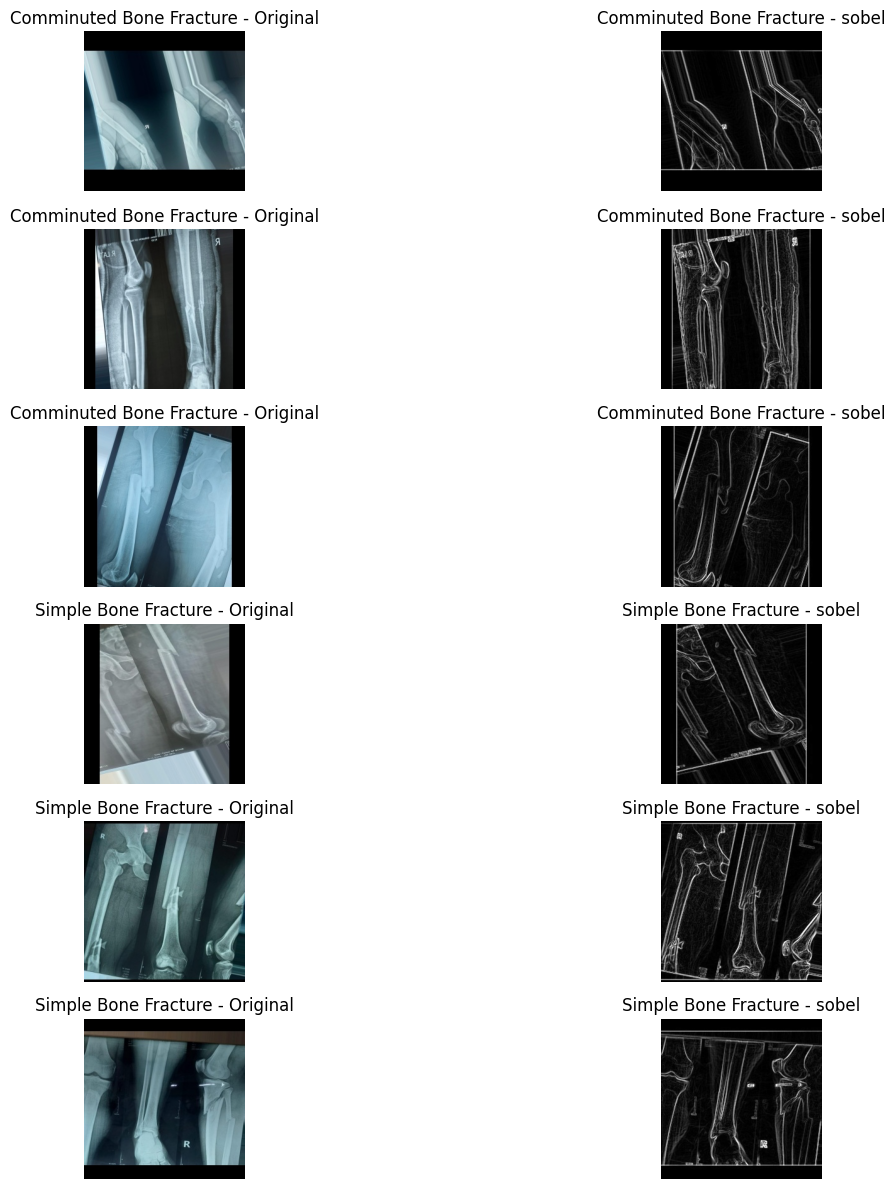


🔍 Displaying samples for CANNY


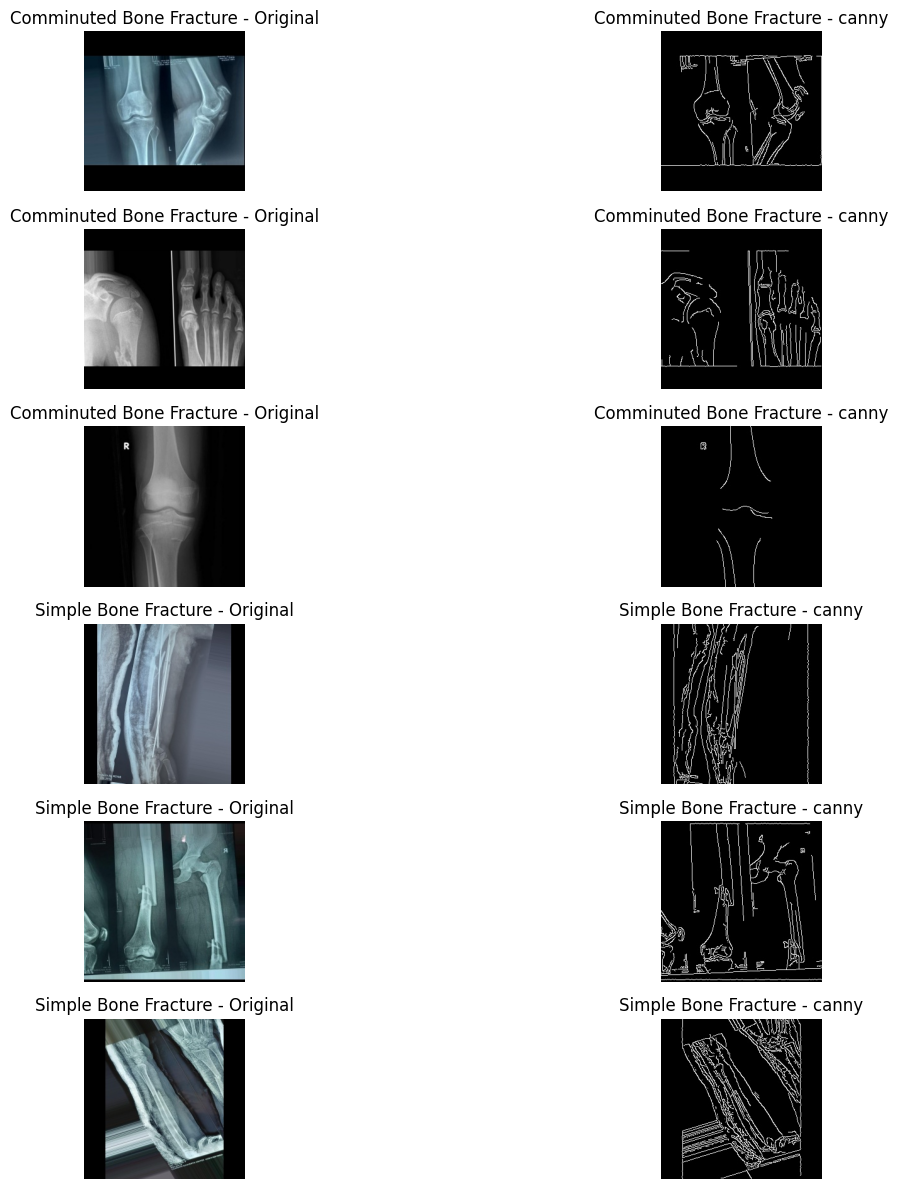


🔍 Displaying samples for LOG


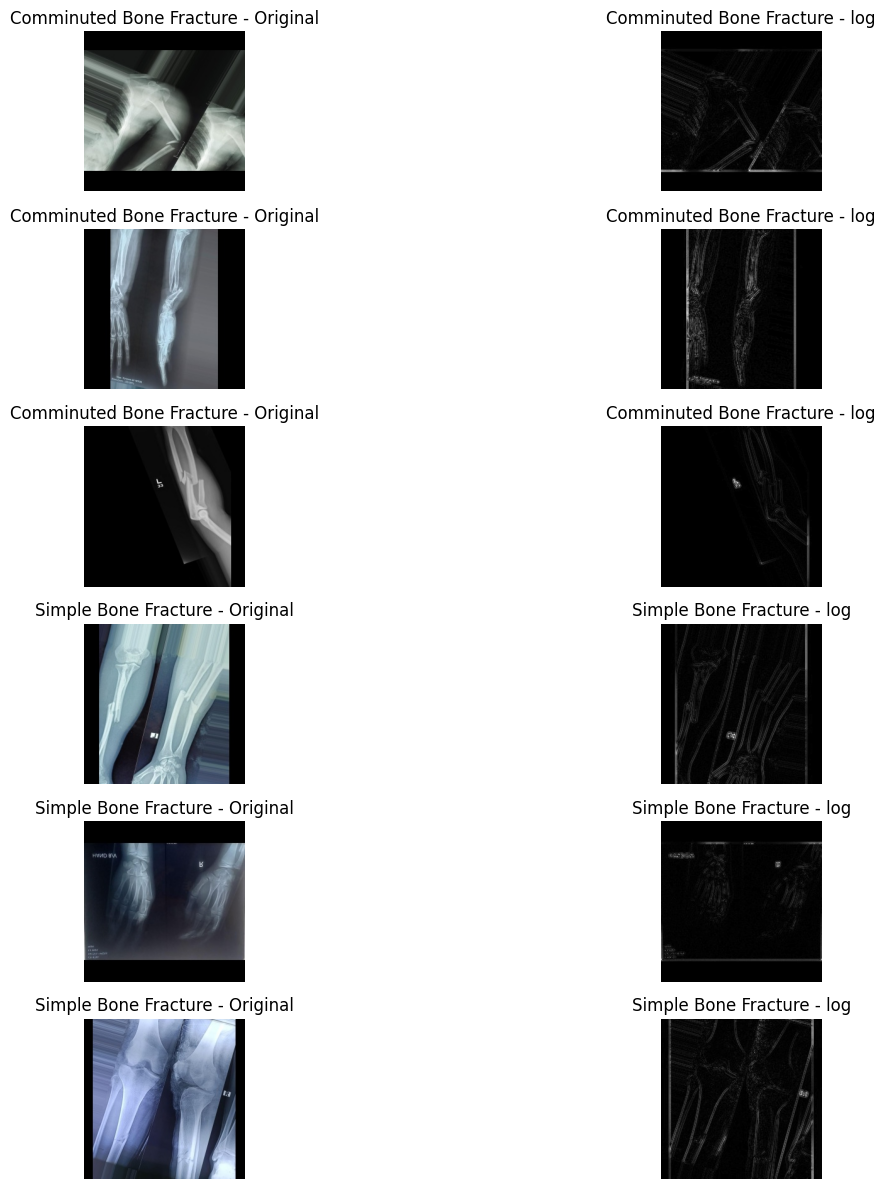

In [9]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = '/kaggle/working/processed_dataset'  # Preprocessed images (resized)
output_root = '/kaggle/working/edge_texture_dataset'
classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']
techniques = ['sobel', 'canny', 'log']

# --- EDGE & TEXTURE FUNCTIONS ---
def apply_sobel(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return sobel

def apply_canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

def apply_log(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    log = cv2.Laplacian(blur, cv2.CV_64F)
    log_abs = cv2.convertScaleAbs(log)
    return log_abs

technique_funcs = {
    'sobel': apply_sobel,
    'canny': apply_canny,
    'log': apply_log
}

rationales = {
    'sobel': "Sobel highlights edges by computing image gradients along X and Y directions.",
    'canny': "Canny provides precise edge detection through multi-stage filtering and thresholding.",
    'log': "LoG smooths the image before applying Laplacian to detect edges robustly while reducing noise."
}

# --- STEP 1: Apply edge/texture extraction and save ---
for tech in techniques:
    print(f"\n⚙️ Applying {tech.upper()} filter...")
    start_time = time.time()
    saved_count = 0

    for class_name in classes:
        input_class_dir = os.path.join(input_path, class_name)
        output_class_dir = os.path.join(output_root, tech, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        for file in os.listdir(input_class_dir):
            if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            img_path = os.path.join(input_class_dir, file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            edge_img = technique_funcs[tech](img)

            # Save single-channel edge image as grayscale PNG
            save_path = os.path.join(output_class_dir, file)
            cv2.imwrite(save_path, edge_img)
            saved_count += 1

    elapsed = time.time() - start_time
    print(f"✅ Saved {saved_count} images with {tech.upper()} filter in {elapsed:.2f}s")

# --- STEP 2: Display 3 before/after samples per class for each technique ---
for tech in techniques:
    print(f"\n🔍 Displaying samples for {tech.upper()}")
    samples_per_class = {}

    for class_name in classes:
        class_dir = os.path.join(input_path, class_name)
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        samples_per_class[class_name] = random.sample(images, min(3, len(images)))

    plt.figure(figsize=(16, 12))
    plot_idx = 1

    for class_name in classes:
        for file in samples_per_class[class_name]:
            orig_path = os.path.join(input_path, class_name, file)
            edge_path = os.path.join(output_root, tech, class_name, file)

            orig = cv2.imread(orig_path)
            edge_img = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)

            if orig is None or edge_img is None:
                continue

            orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

            # Original image
            plt.subplot(6, 2, plot_idx)
            plt.imshow(orig_rgb)
            plt.title(f"{class_name} - Original")
            plt.axis('off')
            plot_idx += 1

            # Edge image (grayscale)
            plt.subplot(6, 2, plot_idx)
            plt.imshow(edge_img, cmap='gray')
            plt.title(f"{class_name} - {tech}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.show()


**Data Augmentation (training-time): Random Flip/Rotate, CutOut, ColorJitter**

In [10]:
# import os
# import cv2
# import time
# import random
# import numpy as np
# import matplotlib.pyplot as plt

# # --- CONFIG ---
# input_path = '/kaggle/working/processed_dataset'  # resized images
# output_root = '/kaggle/working/augmented_dataset'
# classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']
# techniques = ['flip_rotate', 'cutout', 'colorjitter']

# # --- AUGMENTATION FUNCTIONS ---

# def random_flip_rotate(img):
#     # Random flip horizontal or vertical
#     flip_code = random.choice([-1, 0, 1, None])
#     if flip_code is not None:
#         img = cv2.flip(img, flip_code)
#     # Random rotation by 0, 90, 180, 270 degrees
#     angle = random.choice([0, 90, 180, 270])
#     if angle != 0:
#         # Rotate around center
#         (h, w) = img.shape[:2]
#         center = (w // 2, h // 2)
#         M = cv2.getRotationMatrix2D(center, angle, 1.0)
#         img = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)
#     return img

# def cutout(img, max_holes=1, max_size=60):
#     h, w = img.shape[:2]
#     img_copy = img.copy()
#     for _ in range(max_holes):
#         hole_size = random.randint(20, max_size)
#         y = random.randint(0, h - hole_size)
#         x = random.randint(0, w - hole_size)
#         img_copy[y:y+hole_size, x:x+hole_size] = 0  # Black square cutout
#     return img_copy

# def color_jitter(img, brightness=0.2, contrast=0.2, saturation=0.2):
#     img = img.astype(np.float32) / 255.0

#     # Brightness
#     b = 1.0 + random.uniform(-brightness, brightness)
#     img = np.clip(img * b, 0, 1)

#     # Contrast
#     c = 1.0 + random.uniform(-contrast, contrast)
#     mean = np.mean(img, axis=(0,1), keepdims=True)
#     img = np.clip((img - mean) * c + mean, 0, 1)

#     # Saturation
#     img_hsv = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
#     s = 1.0 + random.uniform(-saturation, saturation)
#     img_hsv[:,:,1] = np.clip(img_hsv[:,:,1] * s, 0, 255)
#     img = cv2.cvtColor(img_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0

#     img = (img * 255).astype(np.uint8)
#     return img

# technique_funcs = {
#     'flip_rotate': random_flip_rotate,
#     'cutout': cutout,
#     'colorjitter': color_jitter
# }

# rationales = {
#     'flip_rotate': "Random flipping and rotation increase spatial variance to improve model robustness.",
#     'cutout': "CutOut randomly masks regions to force the model to focus on multiple image parts.",
#     'colorjitter': "Color jittering perturbs brightness, contrast, and saturation to simulate lighting variations."
# }

# # --- STEP 1: Apply augmentations and save ---
# for tech in techniques:
#     print(f"\n⚙️ Applying {tech.upper()} augmentation...")
#     start_time = time.time()
#     saved_count = 0

#     for class_name in classes:
#         in_dir = os.path.join(input_path, class_name)
#         out_dir = os.path.join(output_root, tech, class_name)
#         os.makedirs(out_dir, exist_ok=True)

#         for file in os.listdir(in_dir):
#             if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 continue
#             img_path = os.path.join(in_dir, file)
#             img = cv2.imread(img_path)
#             if img is None:
#                 continue

#             augmented = technique_funcs[tech](img)
#             save_path = os.path.join(out_dir, file)
#             cv2.imwrite(save_path, augmented)
#             saved_count += 1

#     elapsed = time.time() - start_time
#     print(f"✅ Saved {saved_count} images with {tech.upper()} augmentation in {elapsed:.2f}s")

# # --- STEP 2: Display 3 before/after examples per class for each augmentation ---
# for tech in techniques:
#     print(f"\n🔍 Displaying samples for {tech.upper()}")
#     samples_per_class = {}

#     for class_name in classes:
#         in_dir = os.path.join(input_path, class_name)
#         files = [f for f in os.listdir(in_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#         samples_per_class[class_name] = random.sample(files, min(3, len(files)))

#     plt.figure(figsize=(16, 12))
#     plot_idx = 1

#     for class_name in classes:
#         for file in samples_per_class[class_name]:
#             orig_path = os.path.join(input_path, class_name, file)
#             aug_path = os.path.join(output_root, tech, class_name, file)

#             orig = cv2.imread(orig_path)
#             aug = cv2.imread(aug_path)

#             if orig is None or aug is None:
#                 continue

#             orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
#             aug_rgb = cv2.cvtColor(aug, cv2.COLOR_BGR2RGB)

#             plt.subplot(6, 2, plot_idx)
#             plt.imshow(orig_rgb)
#             plt.title(f"{class_name} - Original")
#             plt.axis('off')
#             plot_idx += 1

#             plt.subplot(6, 2, plot_idx)
#             plt.imshow(aug_rgb)
#             plt.title(f"{class_name} - {tech}")
#             plt.axis('off')
#             plot_idx += 1

#     plt.tight_layout()
#     plt.show()


In [11]:
# import os

# augmented_root = '/kaggle/working/augmented_dataset'  # Your augmentation root folder
# techniques = ['flip_rotate', 'cutout', 'colorjitter']
# classes = ['Comminuted Bone Fracture', 'Simple Bone Fracture']

# for tech in techniques:
#     print(f"Technique: {tech}")
#     tech_path = os.path.join(augmented_root, tech)
#     total_count = 0

#     for cls in classes:
#         class_path = os.path.join(tech_path, cls)
#         if os.path.exists(class_path):
#             files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#             count = len(files)
#             total_count += count
#             print(f"  {cls}: {count} images")
#         else:
#             print(f"  {cls}: folder not found")

#     print(f"  Total images for {tech}: {total_count}\n")


In [12]:
# data_dir = '/kaggle/working/augmented_dataset'
# classes = os.listdir(data_dir)
# num_classes = len(classes)
# print("Classes:", classes)

**ConvNeXt-Tiny**

In [13]:
import torch
torch.cuda.is_available()


True

Using device: cuda


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

Epoch [1/70] - Train Loss: 0.5429 - Val Loss: 0.4082 - Val Acc: 0.8071
Epoch [2/70] - Train Loss: 0.2060 - Val Loss: 0.2344 - Val Acc: 0.9140
Epoch [3/70] - Train Loss: 0.0327 - Val Loss: 0.1475 - Val Acc: 0.9350
Epoch [4/70] - Train Loss: 0.0064 - Val Loss: 0.1534 - Val Acc: 0.9413
Epoch [5/70] - Train Loss: 0.0024 - Val Loss: 0.1377 - Val Acc: 0.9560
>> Unfreezing all layers for fine-tuning...
Epoch [6/70] - Train Loss: 0.0015 - Val Loss: 0.1331 - Val Acc: 0.9539
Epoch [7/70] - Train Loss: 0.0004 - Val Loss: 0.1477 - Val Acc: 0.9539
Epoch [8/70] - Train Loss: 0.0002 - Val Loss: 0.1461 - Val Acc: 0.9539
Epoch [9/70] - Train Loss: 0.0001 - Val Loss: 0.1519 - Val Acc: 0.9539
Epoch [10/70] - Train Loss: 0.0001 - Val Loss: 0.1535 - Val Acc: 0.9560
Epoch [11/70] - Train Loss: 0.0001 - Val Loss: 0.1616 - Val Acc: 0.9497
Epoch [12/70] - Train Loss: 0.0001 - Val Loss: 0.1615 - Val Acc: 0.9539
Epoch [13/70] - Train Loss: 0.0001 - Val Loss: 0.1665 - Val Acc: 0.9518
Epoch [14/70] - Train Loss: 0

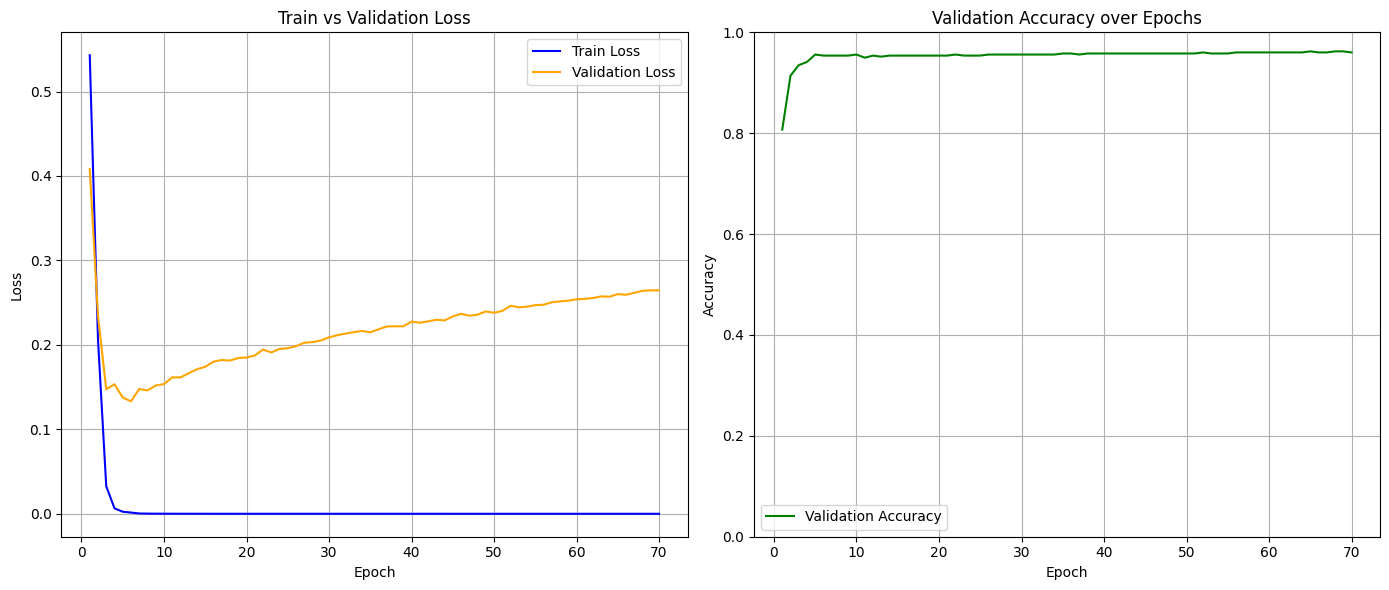

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
import timm
import numpy as np
import os
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Parameters
data_dir = '/kaggle/working/processed_dataset'
batch_size = 32
num_classes = len(os.listdir(data_dir))  # Automatically detect number of classes
freeze_epochs = 5
total_epochs = 70
model_name = 'convnext_tiny.fb_in22k'

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Load dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Train-validation split (80/20)
indices = list(range(len(full_dataset)))
np.random.shuffle(indices)
split = int(0.8 * len(full_dataset))
train_idx, val_idx = indices[:split], indices[split:]

train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Load ConvNeXt-Tiny model
try:
    model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
except Exception as e:
    print(f"WARNING: Could not load pretrained model due to: {e}")
    print("Falling back to random initialization.")
    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)

model.to(device)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Unfreeze last stage (stage 4) for first few epochs
if hasattr(model, 'stages'):
    for param in model.stages[-1].parameters():
        param.requires_grad = True
else:
    raise ValueError("Model has no 'stages' attribute.")

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

# Train function
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    correct = total = 0
    val_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return val_loss / len(loader), correct / total

# Track metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training Loop
for epoch in range(total_epochs):
    if epoch == freeze_epochs:
        print(">> Unfreezing all layers for fine-tuning...")
        for param in model.parameters():
            param.requires_grad = True
        optimizer = optim.AdamW(model.parameters(), lr=1e-5)

    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{total_epochs}] "
          f"- Train Loss: {train_loss:.4f} "
          f"- Val Loss: {val_loss:.4f} "
          f"- Val Acc: {val_acc:.4f}")

# Plot Loss & Accuracy
epochs_range = range(1, total_epochs + 1)
plt.figure(figsize=(14, 6))

# Train vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='blue')
plt.plot(epochs_range, val_losses, label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Classification Report:
                          precision    recall  f1-score   support

Comminuted Bone Fracture       0.98      0.93      0.96       229
    Simple Bone Fracture       0.94      0.98      0.96       248

                accuracy                           0.96       477
               macro avg       0.96      0.96      0.96       477
            weighted avg       0.96      0.96      0.96       477



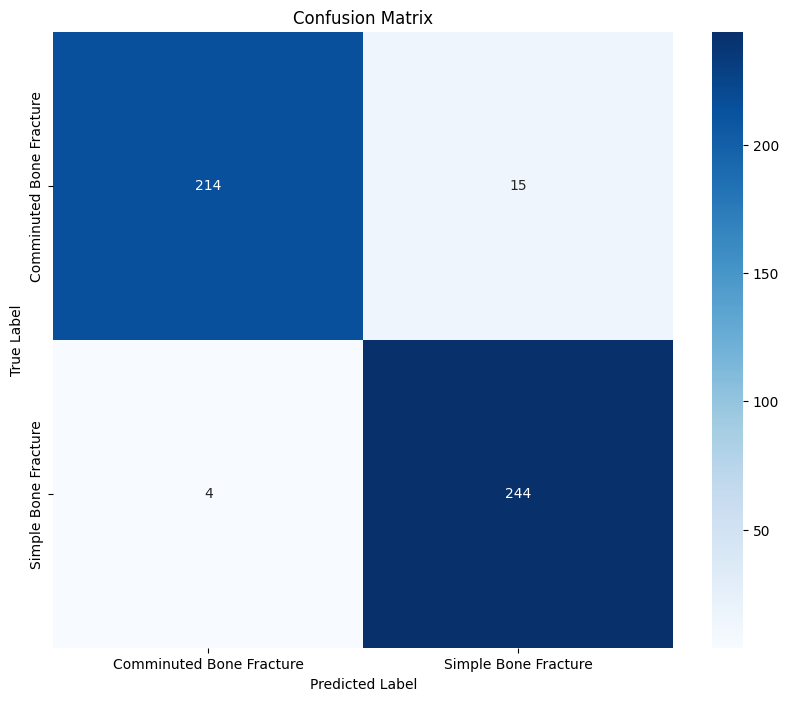

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get class names
class_names = full_dataset.classes

# Collect all predictions and true labels
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**DenseNet-121**

Classes: ['Comminuted Bone Fracture', 'Simple Bone Fracture']


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/70:
  Train Loss: 0.6746
  Val Loss: 0.6150 | Accuracy: 0.6352 | Precision: 0.6345 | Recall: 0.6346 | F1 Score: 0.6345
Epoch 2/70:
  Train Loss: 0.6301
  Val Loss: 0.7855 | Accuracy: 0.6394 | Precision: 0.6394 | Recall: 0.6355 | F1 Score: 0.6349
Epoch 3/70:
  Train Loss: 0.6185
  Val Loss: 0.6191 | Accuracy: 0.6688 | Precision: 0.7573 | Recall: 0.6538 | F1 Score: 0.6250
Epoch 4/70:
  Train Loss: 0.6197
  Val Loss: 0.5855 | Accuracy: 0.6855 | Precision: 0.7417 | Recall: 0.6730 | F1 Score: 0.6564
Epoch 5/70:
  Train Loss: 0.6362
  Val Loss: 0.6098 | Accuracy: 0.6834 | Precision: 0.7277 | Recall: 0.6719 | F1 Score: 0.6580
Epoch 6/70:
  Train Loss: 0.6207
  Val Loss: 0.5980 | Accuracy: 0.6667 | Precision: 0.7015 | Recall: 0.6555 | F1 Score: 0.6417
Epoch 7/70:
  Train Loss: 0.5999
  Val Loss: 0.6675 | Accuracy: 0.6499 | Precision: 0.7919 | Recall: 0.6324 | F1 Score: 0.5855
Epoch 8/70:
  Train Loss: 0.6162
  Val Loss: 0.6896 | Accuracy: 0.6331 | Precision: 0.6580 | Recall: 0.6218 | F

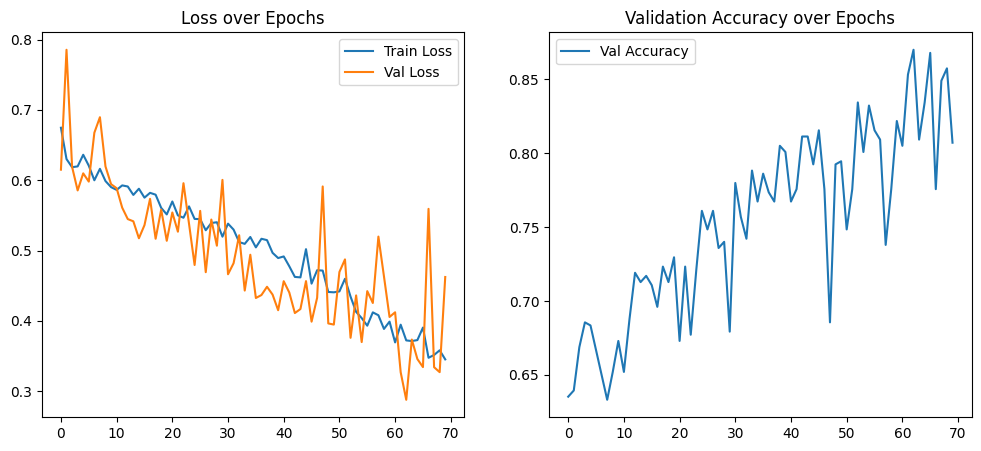

In [16]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. Dataset path
data_dir = '/kaggle/working/processed_dataset'
classes = os.listdir(data_dir)
num_classes = len(classes)
print("Classes:", classes)

# 3. Transforms with augmentation for training, simple for validation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),            # augmentation 1
    transforms.RandomRotation(15),                # augmentation 2 (±15 degrees)
    transforms.ColorJitter(brightness=0.3,       # augmentation 3
                           contrast=0.3,
                           saturation=0.3,
                           hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.25))  # augmentation 4 (Cutout)
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# 4. Load the dataset WITHOUT splitting now, we will split after applying transforms
full_dataset = datasets.ImageFolder(data_dir)

# 5. Split dataset indices manually to apply different transforms for train and val
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_indices, val_indices = torch.utils.data.random_split(range(len(full_dataset)), [train_size, val_size])

# 6. Subset datasets with respective transforms applied dynamically via custom wrapper
from torch.utils.data import Subset

class TransformedDataset(torch.utils.data.Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, idx):
        x, y = self.subset[idx]
        x = self.transform(x)
        return x, y
    
    def __len__(self):
        return len(self.subset)

train_dataset = TransformedDataset(Subset(full_dataset, train_indices), train_transform)
val_dataset = TransformedDataset(Subset(full_dataset, val_indices), val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 7. Model Definition (using DenseNet here per your original code)
def get_densenet(pretrained=False):
    model = models.densenet121(pretrained=pretrained)
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, num_classes)
    return model.to(device)

# 8. Training Function (unchanged)
def train_model(model, criterion, optimizer, num_epochs=20):
    best_acc = 0.0
    train_losses, val_losses = [], []
    val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        correct, total = 0, 0
        val_loss = 0.0
        all_labels, all_preds = [], []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)
        accuracy = correct / total
        precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

        val_accuracies.append(accuracy)
        val_precisions.append(precision)
        val_recalls.append(recall)
        val_f1s.append(f1)

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_densenet.pth')

        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    return model, best_acc, train_losses, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s

# 9. Execution
model = get_densenet(pretrained=False)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, best_acc, train_losses, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s = train_model(
    model, criterion, optimizer, num_epochs=70
)

# 10. Plot Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()


Classification Report:
                          precision    recall  f1-score   support

Comminuted Bone Fracture       0.92      0.65      0.76       227
    Simple Bone Fracture       0.75      0.95      0.84       250

                accuracy                           0.81       477
               macro avg       0.84      0.80      0.80       477
            weighted avg       0.83      0.81      0.80       477



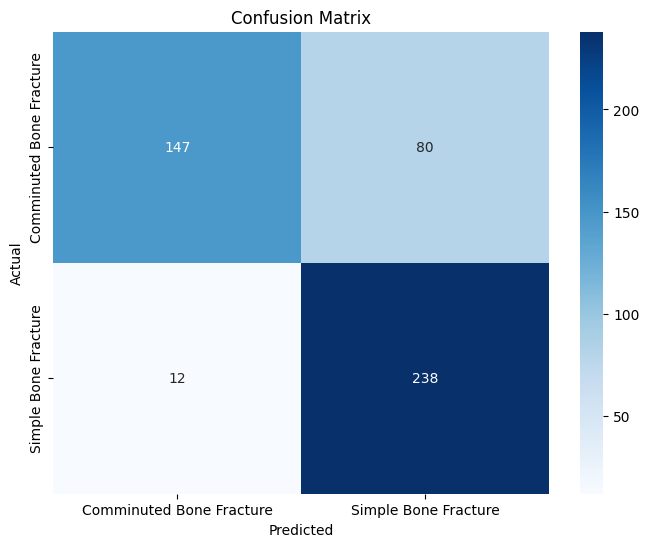

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set model to eval mode
model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**EfficientNetV2**

Classes: ['Comminuted Bone Fracture', 'Simple Bone Fracture']
Epoch [1/70], Train Loss: 0.7246, Val Loss: 0.6411, Val Acc: 0.6646
Epoch [2/70], Train Loss: 0.6584, Val Loss: 0.7745, Val Acc: 0.6394
Epoch [3/70], Train Loss: 0.6405, Val Loss: 0.6788, Val Acc: 0.6646
Epoch [4/70], Train Loss: 0.6517, Val Loss: 1.7120, Val Acc: 0.4340
Epoch [5/70], Train Loss: 0.6504, Val Loss: 1.3797, Val Acc: 0.5493
Epoch [6/70], Train Loss: 0.6517, Val Loss: 0.7079, Val Acc: 0.6101
Epoch [7/70], Train Loss: 0.6368, Val Loss: 0.5869, Val Acc: 0.6520
Epoch [8/70], Train Loss: 0.6348, Val Loss: 0.6597, Val Acc: 0.6499
Epoch [9/70], Train Loss: 0.6387, Val Loss: 0.5799, Val Acc: 0.6709
Epoch [10/70], Train Loss: 0.6219, Val Loss: 0.6302, Val Acc: 0.6583
Epoch [11/70], Train Loss: 0.6133, Val Loss: 0.6121, Val Acc: 0.6667
Epoch [12/70], Train Loss: 0.5977, Val Loss: 0.5791, Val Acc: 0.7107
Epoch [13/70], Train Loss: 0.5887, Val Loss: 0.7292, Val Acc: 0.6394
Epoch [14/70], Train Loss: 0.5858, Val Loss: 0.520

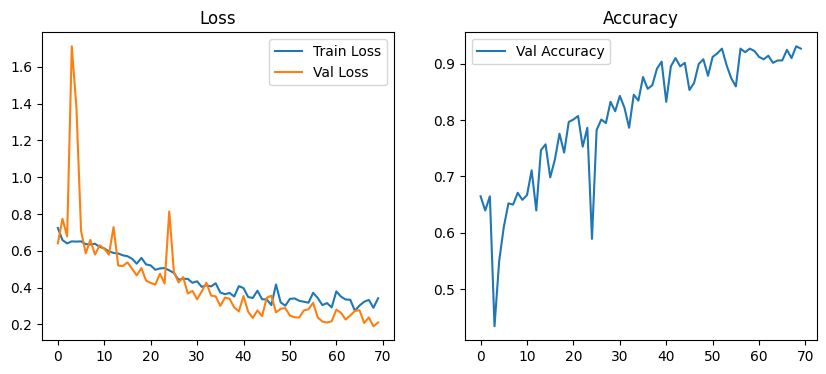

In [18]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset path
data_dir = '/kaggle/working/processed_dataset'

classes = os.listdir(data_dir)
num_classes = len(classes)
print("Classes:", classes)

# Augmentations combined with RandAugment for training
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),              # flip
    transforms.RandomRotation(15),                   # rotate ±15 degrees
    transforms.ColorJitter(brightness=0.3,           # color jitter
                           contrast=0.3,
                           saturation=0.3,
                           hue=0.1),
    transforms.RandAugment(num_ops=2, magnitude=9), # RandAugment
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.25))  # Cutout effect
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225]),
])

# Load datasets with train transforms initially
full_dataset = datasets.ImageFolder(data_dir, transform=train_transform)

# Split dataset indices (80% train, 20% val)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Replace val transforms on validation subset
val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# MixUp helper function
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Load EfficientNet-V2-Small model
def get_efficientnet_v2_small(pretrained=False):
    model = models.efficientnet_v2_s(weights=None if not pretrained else models.EfficientNet_V2_S_Weights.DEFAULT)
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    return model.to(device)

model = get_efficientnet_v2_small(pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with MixUp
def train_model_mixup(model, criterion, optimizer, num_epochs=70, alpha=0.4):
    best_acc = 0.0
    train_losses, val_losses = [], []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha)
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        correct = 0
        total = 0
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        accuracy = correct / total
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {accuracy:.4f}")

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_efficientnet_v2_s.pth')

    return model, best_acc, train_losses, val_losses, val_accuracies

model, best_acc, train_losses, val_losses, val_accuracies = train_model_mixup(model, criterion, optimizer, num_epochs=70)

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


Classification Report:
                          precision    recall  f1-score   support

Comminuted Bone Fracture       0.93      0.92      0.93       238
    Simple Bone Fracture       0.93      0.93      0.93       239

                accuracy                           0.93       477
               macro avg       0.93      0.93      0.93       477
            weighted avg       0.93      0.93      0.93       477



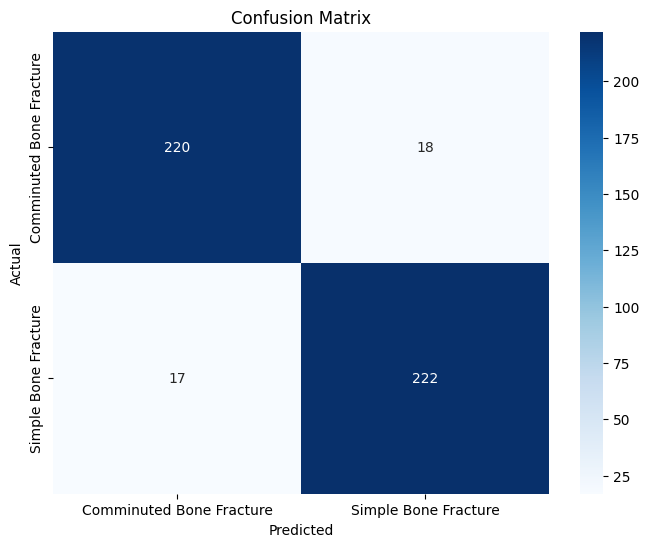

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure model is in evaluation mode
model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Mobile-Net-V3-Large**

Classes: ['Comminuted Bone Fracture', 'Simple Bone Fracture']
Epoch [1/70], Train Loss: 0.6915, Val Loss: 0.7040, Val Acc: 0.5136
Epoch [2/70], Train Loss: 0.6487, Val Loss: 0.7211, Val Acc: 0.5136
Epoch [3/70], Train Loss: 0.5808, Val Loss: 0.6951, Val Acc: 0.5136
Epoch [4/70], Train Loss: 0.5804, Val Loss: 0.7011, Val Acc: 0.5136
Epoch [5/70], Train Loss: 0.5229, Val Loss: 0.7137, Val Acc: 0.5136
Epoch [6/70], Train Loss: 0.5005, Val Loss: 0.7228, Val Acc: 0.5136
Epoch [7/70], Train Loss: 0.4850, Val Loss: 0.7334, Val Acc: 0.5136
Epoch [8/70], Train Loss: 0.4568, Val Loss: 0.6978, Val Acc: 0.5136
Epoch [9/70], Train Loss: 0.4455, Val Loss: 0.7009, Val Acc: 0.5765
Epoch [10/70], Train Loss: 0.4114, Val Loss: 0.4246, Val Acc: 0.8071
Epoch [11/70], Train Loss: 0.3951, Val Loss: 0.4432, Val Acc: 0.8155
Epoch [12/70], Train Loss: 0.4020, Val Loss: 0.5608, Val Acc: 0.7233
Epoch [13/70], Train Loss: 0.3828, Val Loss: 0.4757, Val Acc: 0.8008
Epoch [14/70], Train Loss: 0.3571, Val Loss: 0.495

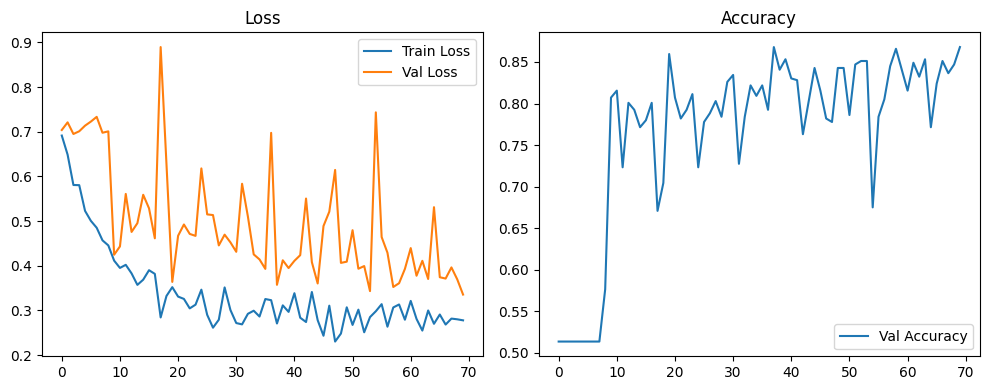

In [20]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset path
data_dir = '/kaggle/working/processed_dataset'

classes = os.listdir(data_dir)
num_classes = len(classes)
print("Classes:", classes)

# === Augmentations: Flip + Rotate + ColorJitter + CutOut ===
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.25))  # CutOut
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# === Dataset loading and splitting ===
full_dataset = datasets.ImageFolder(data_dir, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# === MixUp functions ===
def mixup_data(x, y, alpha=0.4):
    lam = np.random.beta(alpha, alpha) if alpha > 0 else 1
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# === Load MobileNetV3-Large ===
def get_mobilenet_v3_large(pretrained=False):
    model = models.mobilenet_v3_large(weights=None if not pretrained else models.MobileNet_V3_Large_Weights.DEFAULT)
    num_ftrs = model.classifier[3].in_features
    model.classifier[3] = nn.Linear(num_ftrs, num_classes)
    return model.to(device)

model = get_mobilenet_v3_large(pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Training function with MixUp ===
def train_model_mixup(model, criterion, optimizer, num_epochs=70, alpha=0.4):
    best_acc = 0.0
    train_losses, val_losses = [], []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha)
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # === Validation ===
        model.eval()
        correct = 0
        total = 0
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        accuracy = correct / total
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {accuracy:.4f}")

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_mobilenetv3_large.pth')

    return model, best_acc, train_losses, val_losses, val_accuracies

# === Run training ===
model, best_acc, train_losses, val_losses, val_accuracies = train_model_mixup(
    model, criterion, optimizer, num_epochs=70
)

# === Plot Loss & Accuracy ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


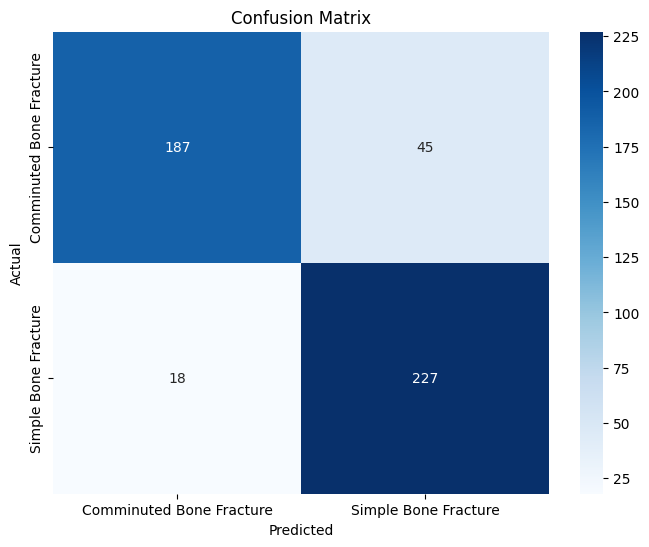

Classification Report:
                          precision    recall  f1-score   support

Comminuted Bone Fracture       0.91      0.81      0.86       232
    Simple Bone Fracture       0.83      0.93      0.88       245

                accuracy                           0.87       477
               macro avg       0.87      0.87      0.87       477
            weighted avg       0.87      0.87      0.87       477



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# === Evaluate model on validation data ===
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# === Confusion Matrix ===
cm = confusion_matrix(all_labels, all_preds)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# === Classification Report ===
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))


**ViT-Base/16**

Epoch [1/70], Train Loss: 0.8161, Val Loss: 0.6531, Val Acc: 0.6122
Epoch [2/70], Train Loss: 0.6615, Val Loss: 0.6179, Val Acc: 0.6247
Epoch [3/70], Train Loss: 0.6237, Val Loss: 0.6106, Val Acc: 0.6184
Epoch [4/70], Train Loss: 0.6146, Val Loss: 0.6319, Val Acc: 0.6583
Epoch [5/70], Train Loss: 0.6332, Val Loss: 0.5906, Val Acc: 0.6268
Epoch [6/70], Train Loss: 0.5806, Val Loss: 0.5877, Val Acc: 0.6625
Epoch [7/70], Train Loss: 0.5922, Val Loss: 0.5866, Val Acc: 0.6352
Epoch [8/70], Train Loss: 0.5763, Val Loss: 0.5831, Val Acc: 0.6646
Epoch [9/70], Train Loss: 0.5722, Val Loss: 0.5827, Val Acc: 0.6751
Epoch [10/70], Train Loss: 0.5417, Val Loss: 0.5272, Val Acc: 0.7128
Epoch [11/70], Train Loss: 0.5171, Val Loss: 0.5301, Val Acc: 0.7065
Epoch [12/70], Train Loss: 0.4812, Val Loss: 0.4958, Val Acc: 0.7254
Epoch [13/70], Train Loss: 0.4972, Val Loss: 0.5561, Val Acc: 0.6709
Epoch [14/70], Train Loss: 0.4674, Val Loss: 0.5582, Val Acc: 0.7023
Epoch [15/70], Train Loss: 0.4948, Val Loss

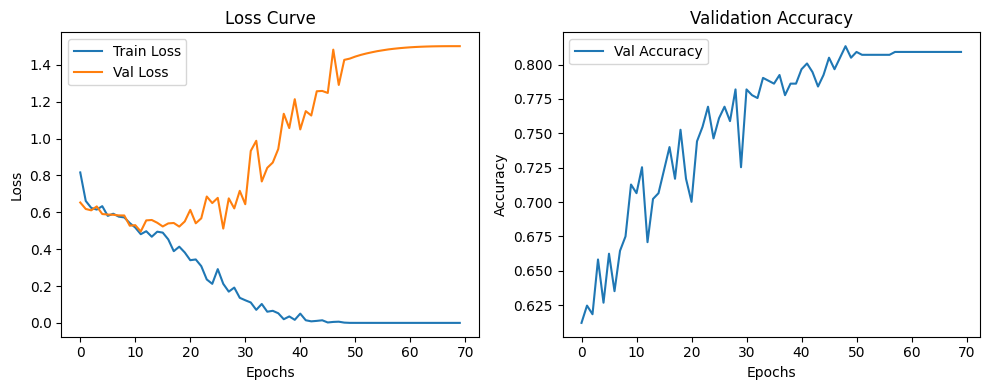

In [22]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import timm

# === Device Setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# === Dataset Path and Class Info ===
data_dir = '/kaggle/working/processed_dataset'  # Update if needed
classes = os.listdir(data_dir)
num_classes = len(classes)

# === Data Augmentation for Training ===
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.25))  # CutOut effect
])

# === Validation Transform ===
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# === Load and Split Dataset ===
full_dataset = datasets.ImageFolder(data_dir, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
val_dataset.dataset.transform = val_transform  # Apply val transform to val split only

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# === ViT Base/16 Model (Offline) ===
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=num_classes)
model.to(device)

# === Loss Function and Optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)

# === Cosine Annealing Scheduler for 50 Epochs ===
total_epochs = 70
total_steps = len(train_loader) * total_epochs
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# === Training & Validation ===
train_losses, val_losses, val_accuracies = [], [], []
best_acc = 0.0

for epoch in range(total_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # === Validation Phase ===
    model.eval()
    correct, total, val_loss = 0, 0, 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{total_epochs}], "
          f"Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Acc: {accuracy:.4f}")

    # === Save Best Model ===
    if accuracy > best_acc:
        best_acc = accuracy
        torch.save(model.state_dict(), 'best_vit_base_patch16_offline.pth')

# === Plot Training Results ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()



Classification Report:
                          precision    recall  f1-score   support

Comminuted Bone Fracture       0.83      0.79      0.81       240
    Simple Bone Fracture       0.79      0.83      0.81       237

                accuracy                           0.81       477
               macro avg       0.81      0.81      0.81       477
            weighted avg       0.81      0.81      0.81       477



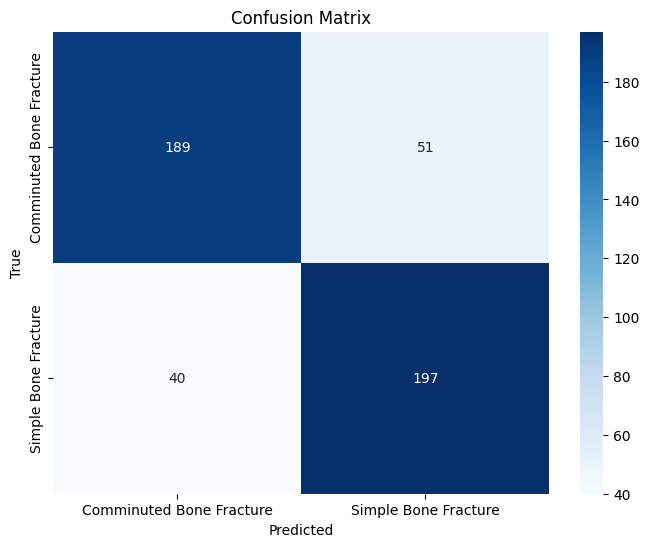

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set model to evaluation mode
model.eval()
all_preds = []
all_labels = []

# Collect predictions and true labels
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
import torch
import torch.nn as nn
import time
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import timm
import os

# === Device Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Dataset Path & Transforms ===
data_dir = '/kaggle/working/processed_dataset'
val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
val_dataset = datasets.ImageFolder(data_dir, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

num_classes = len(os.listdir(data_dir))

# === Helper Functions ===
def evaluate_model(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    start_time = time.time()
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    end_time = time.time()
    
    f1 = f1_score(all_labels, all_preds, average="macro", zero_division=0)
    avg_time_per_img = ((end_time - start_time) / len(val_dataset)) * 1000  # ms/img
    return f1, avg_time_per_img

def count_params(model):
    return sum(p.numel() for p in model.parameters()) / 1e6  # in millions

# === Models to Compare ===
models_info = [
    ("ConvNeXt-Tiny", lambda: timm.create_model('convnext_tiny.fb_in22k', pretrained=False, num_classes=num_classes), 'best_convnext.pth'),
    ("DenseNet-121", lambda: models.densenet121(weights=None), 'best_densenet.pth'),
    ("EfficientNetV2-S", lambda: models.efficientnet_v2_s(weights=None), 'best_efficientnet_v2_s.pth'),
    ("MobileNetV3-Large", lambda: models.mobilenet_v3_large(weights=None), 'best_mobilenetv3_large.pth'),
    ("ViT-Base/16", lambda: timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=num_classes), 'best_vit_base_patch16_offline.pth')
]

results = []

for name, constructor, weight_path in models_info:
    print(f"\nEvaluating {name}...")
    model = constructor()
    
    # Adjust classifier for custom classes
    if name == "DenseNet-121":
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    elif name == "EfficientNetV2-S":
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    elif name == "MobileNetV3-Large":
        num_ftrs = model.classifier[3].in_features
        model.classifier[3] = nn.Linear(num_ftrs, num_classes)

    model.to(device)
    
    # Load best weights if available
    if os.path.exists(weight_path):
        model.load_state_dict(torch.load(weight_path, map_location=device))
        print(f"Loaded weights from {weight_path}")
    else:
        print(f"WARNING: {weight_path} not found, using random init.")

    # Evaluate
    f1, inference_ms = evaluate_model(model, val_loader)
    params_m = count_params(model)
    results.append([name, round(f1,4), round(params_m,2), round(inference_ms,2)])

# === Create Comparison Table ===
df = pd.DataFrame(results, columns=["Model", "Test F1", "Params (M)", "Inference (ms/img)"])
print("\nComparison Table:")
print(df)

# Save to CSV for Kaggle
df.to_csv("/kaggle/working/model_comparison.csv", index=False)

Using device: cuda

Evaluating ConvNeXt-Tiny...

Evaluating DenseNet-121...
Loaded weights from best_densenet.pth

Evaluating EfficientNetV2-S...
Loaded weights from best_efficientnet_v2_s.pth

Evaluating MobileNetV3-Large...
Loaded weights from best_mobilenetv3_large.pth

Evaluating ViT-Base/16...
Loaded weights from best_vit_base_patch16_offline.pth

Comparison Table:
               Model  Test F1  Params (M)  Inference (ms/img)
0      ConvNeXt-Tiny   0.4666       27.82                6.03
1       DenseNet-121   0.8985        6.96                5.16
2   EfficientNetV2-S   0.9820       20.18                5.03
3  MobileNetV3-Large   0.9618        4.20                3.00
4        ViT-Base/16   0.9626       85.80               13.56
